# Flowtensor Demo

## 1. Importing the libraries

Convolution2D, Maxpool2D, and Softmax works similarly with the famous libraries such as Tensorflow, PyTorch, Caffe, etc. However, it is still very limited unlike those libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import our custom library
from lib.flowtensor import Convolution2D, MaxPool2D, Softmax
from lib.utils import train, test, show_loss_graph, show_acc_graph, predict
# let's test with mnist datasets
from tensorflow.keras.datasets import mnist, fashion_mnist

# set random seed
import random
random.seed(111)

import lib

C:\Users\ASUS\Anaconda3\envs\dissertation_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ASUS\Anaconda3\envs\dissertation_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ASUS\Anaconda3\envs\dissertation_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ASUS\Anaconda3\envs\dissertation_e

To look at the documentation, you can run this

In [2]:
?Convolution2D

Or use double question mark '??' to explore more about the library

In [3]:
??Convolution2D

I use mnist datasets to test the custom library

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
# creates an array of item which is useful later in the prediction
items = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandals", "Shirt", "Sneaker", "Bag", "Ankle Boots"]

Text(0.5, 1.0, 'Sandals')

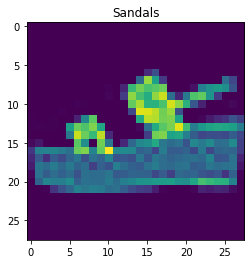

In [6]:
# try plotting 1 of the items
idx = 12
plt.imshow(x_train[idx])
plt.title(items[y_train[idx]])

## 2. Model Initialization

In this part, we define our convolutional, pooling, and dense layer like we do in Tensorflow, PyTorch, etc.
However, in this library, <b>as of now, we could not stack the layers</b> like the other libraries do. So, we can only have 3 layers in total.

If you want to know how the dimensions are changed between each layer, you can enable <b>debugging=True</b> in Convolution2D, Maxpool2D, and Softmax

In [7]:
convolution = Convolution2D(filter_shape=(3,3), num_filters=8, padding='same', activation='relu', stride=1, kernel_init='random')
maxpool = MaxPool2D(pool_size=2)
temp = convolution.conv2d(x_train[0])
temp = maxpool.pool(temp)
fully_connected = Softmax(num_features=temp.shape[0]*temp.shape[1]*temp.shape[2], num_nodes=len(items), activation='softmax', regularizer='l2')
# fully_connected = Softmax(num_features=15x15x8, num_nodes=10, activation='softmax', debugging=True) # This also works

'temp' variable is used for convenience in declaring the final dimension in the dense layer, instead of declaring it manually
fully_connected = Softmax(num_features=15x15x8, num_nodes=10, activation='softmax')

## 3. Training & Testing Phase

Training phase uses the 'SGD' or 'Stochastic Gradient Descent' optimizer (batch size=1) and display the loss and accuracy for each 100 data

Start with low number of epochs and learning rate, then increase the number if further training is possible.
I start with:
<ul>
    <li>3 epochs</li>
    <li>0.01 learning rate</li>
    <li>Take only 1000 data for training. Bigger training data = longer training process </li>
</ul>

In [8]:
# train the model
l, a = train(convolution, maxpool, fully_connected, epochs=3, lr=0.01, features=x_train[:1000], labels=y_train[:1000])

============= EPOCH 1 =============
Step 100 : Loss= 5.628708492437313 | Accuracy= 33 %
Step 200 : Loss= 1.05697583900249 | Accuracy= 66 %
Step 300 : Loss= 1.1805728311819321 | Accuracy= 64 %
Step 400 : Loss= 1.113889698344543 | Accuracy= 65 %
Step 500 : Loss= 0.8260914997976737 | Accuracy= 76 %
Step 600 : Loss= 0.9933725696437523 | Accuracy= 68 %
Step 700 : Loss= 0.7834580609838675 | Accuracy= 77 %
Step 800 : Loss= 0.7345271662540211 | Accuracy= 78 %
Step 900 : Loss= 0.8895906028593568 | Accuracy= 77 %
Training time: 105 s
============= EPOCH 2 =============
Step 100 : Loss= 0.691138345725693 | Accuracy= 83 %
Step 200 : Loss= 0.6953649330461436 | Accuracy= 82 %
Step 300 : Loss= 0.9210050634997503 | Accuracy= 76 %
Step 400 : Loss= 0.8600116917182201 | Accuracy= 75 %
Step 500 : Loss= 0.651192198603106 | Accuracy= 84 %
Step 600 : Loss= 0.7782457730677116 | Accuracy= 75 %
Step 700 : Loss= 0.6329872467137663 | Accuracy= 83 %
Step 800 : Loss= 0.6112213230897866 | Accuracy= 82 %
Step 900 : L

In [9]:
test(convolution, maxpool, fully_connected, x_test[:1000], y_test[:1000])

Test Loss:  0.7354672209392519
Test Accuracy:  0.783 ( 78.3 % )


Is this performance good or bad? We can compare this to tensorflow, pytorch, or other libraries

## 4. Results

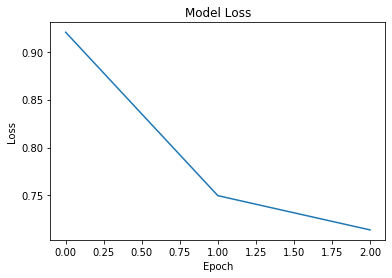

In [10]:
show_loss_graph(l)

Loss drops down steadily, which means the model is learning and no sign of overfitting

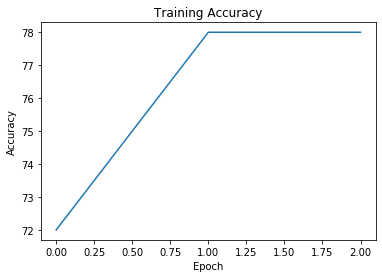

In [11]:
show_acc_graph(a)

Accuracy is also increasing and it is still increasing even after 2nd epoch. Further training is still possible with more epochs

In [12]:
test_idx = 10
pred = predict(convolution, maxpool, fully_connected, x_test[test_idx], y_test[test_idx])

Text(0.5,1,'Coat')

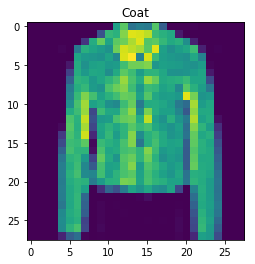

In [13]:
plt.imshow(x_test[test_idx])
plt.title(items[pred])

## 5. Comparison with keras.tensorflow

Now we might feel a bit sceptical about the custom library achieving ~70% accuracy on the test set. Here, I already provided a model from keras.tensorflow <b> with the same hyperparameters </b> as we did above.

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras import regularizers

Using TensorFlow backend.


In [15]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:
x_train = x_train/255
x_test = x_test/255

In case we forget, here's the configuration for each layer
<ul>
    <li> Convolutional2D: 8 filters (kernels), 3x3 filter size, same padding, relu activation function </li>
    <li> MaxPool2D: 2x2 pool size </li>
    <li> Dense: 10 classes (number of nodes), softtmax activation function, l2 regularization with 0.01 regularization lambda </li>
</ul>
Don't forget to train it with SGD optimizer since our custom model can be only trained with SGD optimizer

In [17]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(x_train[0].shape)))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

opt = SGD(lr=0.01)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x=x_train[:1000], y=y_train[:1000], epochs=5, batch_size=1, verbose=1) # since it's SGD, set batch_size=1

Epoch 1/5
1000/1000 [==============================] - 7s 7ms/step - loss: 1.4536 - acc: 0.5750
Epoch 2/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.9989 - acc: 0.7410
Epoch 3/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.8659 - acc: 0.7800
Epoch 4/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.7568 - acc: 0.8320
Epoch 5/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.7121 - acc: 0.8450


In [19]:
model.evaluate(x_test[:1000], y_test[:1000])

1000/1000 [==============================] - 1s 704us/step


[0.805190800666809, 0.786]

## 6. Medical Imaging

Dataset available at: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

I used the pneumonia dataset above to test the model to classify a chest whether it is infected by pneumonia or not from a chest x-ray

In [14]:
from glob import glob
import cv2
import random

In [15]:
NORMAL_TRAIN_PATH = '../xray-images/pneumonia-dataset/chest_xray/train/NORMAL/*.jpeg'
PNEU_TRAIN_PATH = '../xray-images/pneumonia-dataset/chest_xray/train/PNEUMONIA/*.jpeg'

normal_img = glob(NORMAL_TRAIN_PATH)
pneu_img = glob(PNEU_TRAIN_PATH)

keras has a convenient method for image processing and augmentation with ImageDataGenerator() and .flow_from_directory(). However, this custom library is incapable of doing so. Thus, I need to borrow this method from keras

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# generate data augmentation for train and test set
train_data_generator = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_data_generator = ImageDataGenerator(rescale=1./255)

We can downsize the target_size to smaller size if 224x224 is still too large and takes too long time to train. 120x120 would be a good alternative.

In [19]:
# change batch accordingly
train_batch = 1000 # total train images = 5216
test_batch = 624 # total test images = 624

PATH = '../xray-images/pneumonia-dataset/chest_xray/' # change the path accordingly to your own directory
train_x, train_y = next(train_data_generator.flow_from_directory(PATH+'train', target_size=(224,224), batch_size=train_batch, class_mode='binary', color_mode='grayscale', seed=101))
test_x, test_y = next(test_data_generator.flow_from_directory(PATH+'test', target_size=(224,224), batch_size=test_batch, class_mode='binary', color_mode='grayscale', seed=101))

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Total training set should be <b>5216 images</b><br>
Total test set should be <b>624 images</b>

In [20]:
print("train_x before reshape:", train_x.shape)
print("train_y type:", type(train_y[0]))

train_x before reshape: (1000, 224, 224, 1)
train_y type: <class 'numpy.float32'>


After applying data generator, train_x has dimension of (batch_size, width, height, channel). However, our Convolution2D class accepts (batch_size, width, height) as the input. We can solve this by using np.reshape to reshape the dimension

As for the labels, cast it as uint8 instead of float32

In [21]:
train_x = np.reshape(train_x, (train_batch, 224, 224))
train_y = train_y.astype(np.uint8)
test_x = np.reshape(test_x, (test_batch, 224, 224))
test_y = test_y.astype(np.uint8)

In [22]:
print("train_x after reshape:", train_x.shape)
print("train_y type:", type(train_y[0]))

train_x after reshape: (1000, 224, 224)
train_y type: <class 'numpy.uint8'>


Now we are good to go! Let's rebuild the model for the pneumonia dataset

In [27]:
# model initialization
convolution = Convolution2D(filter_shape=(3,3), num_filters=8, padding='same', activation='relu', stride=1, kernel_init='random')
maxpool = MaxPool2D(pool_size=2)
temp = convolution.conv2d(train_x[0])
temp = maxpool.pool(temp)
fully_connected = Softmax(num_features=temp.shape[0]*temp.shape[1]*temp.shape[2], num_nodes=2, activation='softmax', regularizer='l2')

Notice that num_nodes in Softmax class is set to 2 because we have to classify 2 classes (normal and pneumonia)

#### WARNING: Both training and testing might take very long time to run

In [28]:
# train the model
l, a = train(convolution, maxpool, fully_connected, epochs=1, lr=0.001, features=train_x, labels=train_y)

============= EPOCH 1 =============
Step 100 : Loss= 0.6817597974965017 | Accuracy= 74 %
Step 200 : Loss= 0.6637915336766322 | Accuracy= 73 %
Step 300 : Loss= 0.6350417670668573 | Accuracy= 79 %
Step 400 : Loss= 0.6487887738944015 | Accuracy= 69 %
Step 500 : Loss= 0.635421740740367 | Accuracy= 71 %
Step 600 : Loss= 0.6314415939247587 | Accuracy= 71 %
Step 700 : Loss= 0.5925464806879001 | Accuracy= 78 %
Step 800 : Loss= 0.5966443066857043 | Accuracy= 75 %
Step 900 : Loss= 0.5885615977281606 | Accuracy= 76 %
Training time: 6413 s


It takes too long even with 1 epoch

In [29]:
test(convolution, maxpool, fully_connected, test_x, test_y)

Test Loss:  0.667729176056032
Test Accuracy:  0.625 ( 62.5 % )


We got 0.67 loss and 62% accuracy on the test set.

In [30]:
img_idx = 15
print("Model prediction:", predict(convolution, maxpool, fully_connected, img=test_x[img_idx], label=test_y[img_idx]))
print("Actual label:", test_y[img_idx])

Model prediction: 1
Actual label: 0


In [31]:
img_idx = 0
print("Model prediction:", predict(convolution, maxpool, fully_connected, img=test_x[img_idx], label=test_y[img_idx]))
print("Actual label:", test_y[img_idx])

Model prediction: 1
Actual label: 1


Even with just 3 simple layers of convolutional, maxpooling, and dense, it is able to classify chest x-ray with pneumonia infection and normal chest x-ray although the accuracy is still far from the "state of the art"

In [25]:
# change batch accordingly
train_batch = 1000 # total train images = 5216
test_batch = 624 # total test images = 624

PATH = '../xray-images/pneumonia-dataset/chest_xray/' # change the path accordingly to your own directory
train_x, train_y = next(train_data_generator.flow_from_directory(PATH+'train', target_size=(224,224), batch_size=train_batch, class_mode='binary', color_mode='grayscale', seed=101))
test_x, test_y = next(test_data_generator.flow_from_directory(PATH+'test', target_size=(224,224), batch_size=test_batch, class_mode='binary', color_mode='grayscale', seed=101))

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [30]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(train_x[0].shape)))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

opt = SGD(lr=0.001)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(x=train_x[:1000], y=train_y[:1000], epochs=1, batch_size=1, verbose=1) # since it's SGD, set batch_size=1

Epoch 1/1
1000/1000 [==============================] - 13s 13ms/step - loss: 4.0340 - acc: 0.7480


In [33]:
model.evaluate(test_x[:1000], test_y[:1000])

624/624 [==============================] - 4s 6ms/step


[5.991856538332426, 0.625]